#### Load xenium data into spatialData object

In [1]:
import spatialdata_io
from pathlib import Path

replicate1_path = Path('/g/huber/projects/GSK_lazic/public_data/BIDCell/Xenium_BC/Replicate1/data')

sdata_r1 = spatialdata_io.xenium(replicate1_path)

/home/lazic/miniforge3/envs/sc_analysis_sdata/lib/python3.10/site-packages/dask/dataframe/__init__.py:31: FutureWarning: The legacy Dask DataFrame implementation is deprecated and will be removed in a future version. Set the configuration option `dataframe.query-planning` to `True` or None to enable the new Dask Dataframe implementation and silence this warning.
  warnings.warn(
/home/lazic/miniforge3/envs/sc_analysis_sdata/lib/python3.10/site-packages/xarray_schema/__init__.py:1: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import DistributionNotFound, get_distribution
/home/lazic/miniforge3/envs/sc_analysis_sdata/lib/python3.10/site-packages/anndata/utils.py:434: FutureWarning: Importing read_text from `anndata` is deprecated. Import anndata.io.read_text instead.
  warn

INFO     reading /g/huber/projects/GSK_lazic/public_data/BIDCell/Xenium_BC/Replicate1/data/cell_feature_matrix.h5  


/tmp/ipykernel_1838041/421701928.py:6: DeprecationWarning: The default value of `cells_as_circles` will change to `False` in the next release. Please pass `True` explicitly to maintain the current behavior.
  sdata_r1 = spatialdata_io.xenium(replicate1_path)


INFO     Transposing `data` of type: <class 'dask.array.core.Array'> to ('c', 'y', 'x').                           


#### Sounding using bounding_box_query

In [3]:
from spatialdata import bounding_box_query

px_to_um_factor = 0.2125

def crop0(x):
    return bounding_box_query(
        x,
        min_coordinate=[1520/px_to_um_factor, 2750/px_to_um_factor],
        max_coordinate=[1711/px_to_um_factor, 2912/px_to_um_factor],
        axes=("x", "y"),
        target_coordinate_system="global",
    )


sdata_subset = crop0(sdata_r1)

/home/lazic/miniforge3/envs/sc_analysis_sdata/lib/python3.10/functools.py:889: UserWarning: The object has `points` element. Depending on the number of points, querying MAY suffer from performance issues. Please consider filtering the object before calling this function by calling the `subset()` method of `SpatialData`.
  return dispatch(args[0].__class__)(*args, **kw)
/home/lazic/miniforge3/envs/sc_analysis_sdata/lib/python3.10/site-packages/anndata/_core/aligned_df.py:68: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [4]:
sdata_subset

SpatialData object
├── Images
│     ├── 'he_image': DataTree[cyx] (3, 448, 527), (3, 224, 264), (3, 112, 131), (3, 56, 66), (3, 28, 33)
│     ├── 'if_image': DataTree[cyx] (3, 221, 260), (3, 111, 130), (3, 55, 65), (3, 28, 33), (3, 13, 16)
│     ├── 'morphology_focus': DataTree[cyx] (1, 763, 899), (1, 381, 450), (1, 191, 225), (1, 95, 112), (1, 47, 56)
│     └── 'morphology_mip': DataTree[cyx] (1, 763, 899), (1, 381, 450), (1, 191, 225), (1, 95, 112), (1, 47, 56)
├── Labels
│     ├── 'cell_labels': DataTree[yx] (763, 899), (381, 450), (191, 225), (95, 112), (47, 56)
│     └── 'nucleus_labels': DataTree[yx] (763, 899), (381, 450), (191, 225), (95, 112), (47, 56)
├── Points
│     └── 'transcripts': DataFrame with shape: (<Delayed>, 8) (3D points)
├── Shapes
│     ├── 'cell_boundaries': GeoDataFrame shape: (158, 1) (2D shapes)
│     ├── 'cell_circles': GeoDataFrame shape: (122, 2) (2D shapes)
│     └── 'nucleus_boundaries': GeoDataFrame shape: (132, 1) (2D shapes)
└── Tables
      └── 'ta

#### Write to zarr file

In [18]:
sdata_subset.write('/g/huber/projects/CODEX/segtraq/data/xenium_sp_subset.zarr', overwrite=True)

INFO     The Zarr backing store has been changed from None the new file path:                                      
         /g/huber/projects/CODEX/segtraq/data/xenium_sp_subset.zarr                                                


#### Read and visualize

/home/lazic/miniforge3/envs/sc_analysis_sdata/lib/python3.10/site-packages/spatialdata/_core/spatialdata.py:511: UserWarning: Converting `region_key: region` to categorical dtype.
  convert_region_column_to_categorical(table)


INFO     Using 'datashader' backend with 'None' as reduction method to speed up plotting. Depending on the         
         reduction method, the value range of the plot might change. Set method to 'matplotlib' do disable this    
         behaviour.                                                                                                


/home/lazic/miniforge3/envs/sc_analysis_sdata/lib/python3.10/site-packages/spatialdata/_core/_elements.py:105: UserWarning: Key `cell_boundaries` already exists. Overwriting it in-memory.
  self._check_key(key, self.keys(), self._shared_keys)
/home/lazic/miniforge3/envs/sc_analysis_sdata/lib/python3.10/site-packages/spatialdata/_core/_elements.py:125: UserWarning: Key `table` already exists. Overwriting it in-memory.
  self._check_key(key, self.keys(), self._shared_keys)
/home/lazic/miniforge3/envs/sc_analysis_sdata/lib/python3.10/site-packages/anndata/_core/anndata.py:381: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(
/home/lazic/miniforge3/envs/sc_analysis_sdata/lib/python3.10/site-packages/anndata/_core/aligned_df.py:68: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/home/lazic/miniforge3/envs/sc_analysis_sdata/lib/python3.10/site-packages/spatial

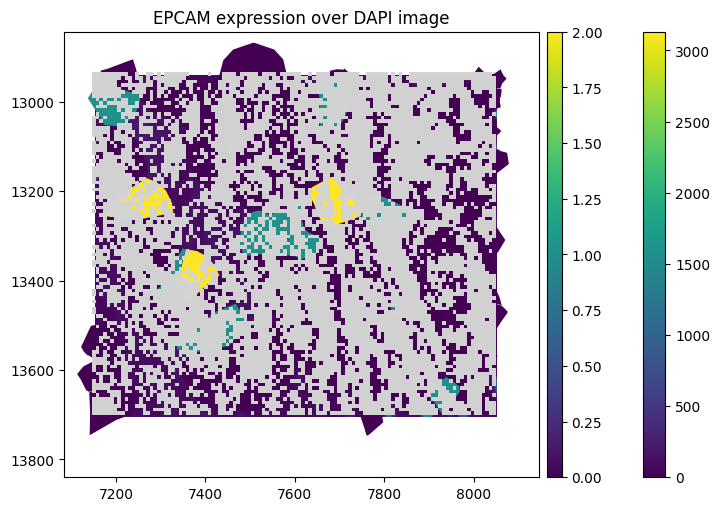

In [17]:
import matplotlib.pyplot as plt
import spatialdata_plot

gene_name = 'EPCAM'

# link annotations with cell boundaries
sdata_subset.tables["table"].obs["region"] = "cell_boundaries"
sdata_subset.set_table_annotates_spatialelement("table", region="cell_boundaries")

# plot
sdata_subset.pl.render_images("morphology_focus").pl.render_shapes(
    "cell_boundaries",
    color=gene_name,
).pl.render_points(
    "transcripts",
    size = 0.05,
    # color="feature_name",
    # groups=gene_name,
    # palette="orange",
).pl.show(title=f"{gene_name} expression over DAPI image", coordinate_systems="global", figsize=(10, 5))

In [21]:
sdata_subset

SpatialData object, with associated Zarr store: /g/huber/projects/CODEX/segtraq/data/xenium_sp_subset.zarr
├── Images
│     ├── 'he_image': DataTree[cyx] (3, 448, 527), (3, 224, 264), (3, 112, 131), (3, 56, 66), (3, 28, 33)
│     ├── 'if_image': DataTree[cyx] (3, 221, 260), (3, 111, 130), (3, 55, 65), (3, 28, 33), (3, 13, 16)
│     ├── 'morphology_focus': DataTree[cyx] (1, 763, 899), (1, 381, 450), (1, 191, 225), (1, 95, 112), (1, 47, 56)
│     └── 'morphology_mip': DataTree[cyx] (1, 763, 899), (1, 381, 450), (1, 191, 225), (1, 95, 112), (1, 47, 56)
├── Labels
│     ├── 'cell_labels': DataTree[yx] (763, 899), (381, 450), (191, 225), (95, 112), (47, 56)
│     └── 'nucleus_labels': DataTree[yx] (763, 899), (381, 450), (191, 225), (95, 112), (47, 56)
├── Points
│     └── 'transcripts': DataFrame with shape: (<Delayed>, 8) (3D points)
├── Shapes
│     ├── 'cell_boundaries': GeoDataFrame shape: (158, 1) (2D shapes)
│     ├── 'cell_circles': GeoDataFrame shape: (122, 2) (2D shapes)
│     └──

/home/lazic/miniforge3/envs/sc_analysis_sdata/lib/python3.10/site-packages/spatialdata/_core/spatialdata.py:511: UserWarning: Converting `region_key: region` to categorical dtype.
  convert_region_column_to_categorical(table)


INFO     input has more than 103 categories. Uniform 'grey' color will be used for all categories.                 


/home/lazic/miniforge3/envs/sc_analysis_sdata/lib/python3.10/site-packages/anndata/_core/anndata.py:381: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(
/home/lazic/miniforge3/envs/sc_analysis_sdata/lib/python3.10/site-packages/anndata/_core/aligned_df.py:68: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/home/lazic/miniforge3/envs/sc_analysis_sdata/lib/python3.10/site-packages/spatialdata/_core/_elements.py:115: UserWarning: Key `transcripts` already exists. Overwriting it in-memory.
  self._check_key(key, self.keys(), self._shared_keys)
/home/lazic/miniforge3/envs/sc_analysis_sdata/lib/python3.10/site-packages/spatialdata_plot/pl/utils.py:775: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to

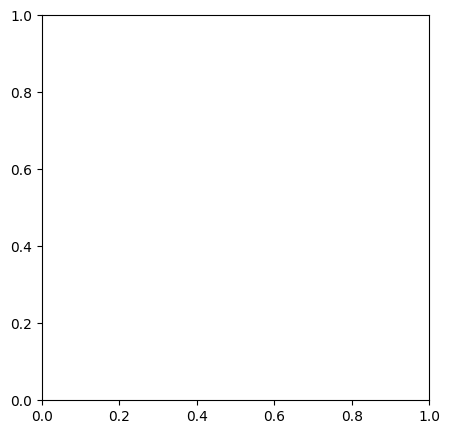

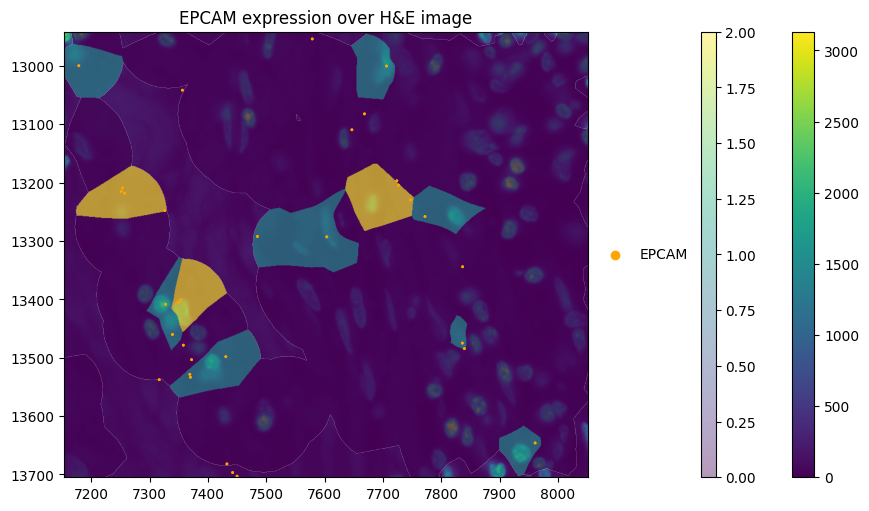

In [ ]:
#link annotation with cell labels
sdata_subset.tables["table"].obs["region"] = "cell_labels"
sdata_subset.set_table_annotates_spatialelement("table", region="cell_labels")

fig, axes = plt.subplots(1, 1, figsize=(5, 5))

sdata_subset.pl.render_images("morphology_focus").pl.render_labels(
    "cell_labels",
    color=gene_name,
).pl.render_points(
    "transcripts",
    color="feature_name",
    groups=gene_name,
    palette="orange",
).pl.show(title=f"{gene_name} expression over H&E image", coordinate_systems="global", figsize=(10, 5))

INFO     Using 'datashader' backend with 'None' as reduction method to speed up plotting. Depending on the         
         reduction method, the value range of the plot might change. Set method to 'matplotlib' do disable this    
         behaviour.                                                                                                


/home/lazic/miniforge3/envs/sc_analysis_sdata/lib/python3.10/site-packages/anndata/_core/anndata.py:381: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(
/home/lazic/miniforge3/envs/sc_analysis_sdata/lib/python3.10/site-packages/anndata/_core/aligned_df.py:68: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/home/lazic/miniforge3/envs/sc_analysis_sdata/lib/python3.10/site-packages/spatialdata/_core/_elements.py:115: UserWarning: Key `transcripts` already exists. Overwriting it in-memory.
  self._check_key(key, self.keys(), self._shared_keys)


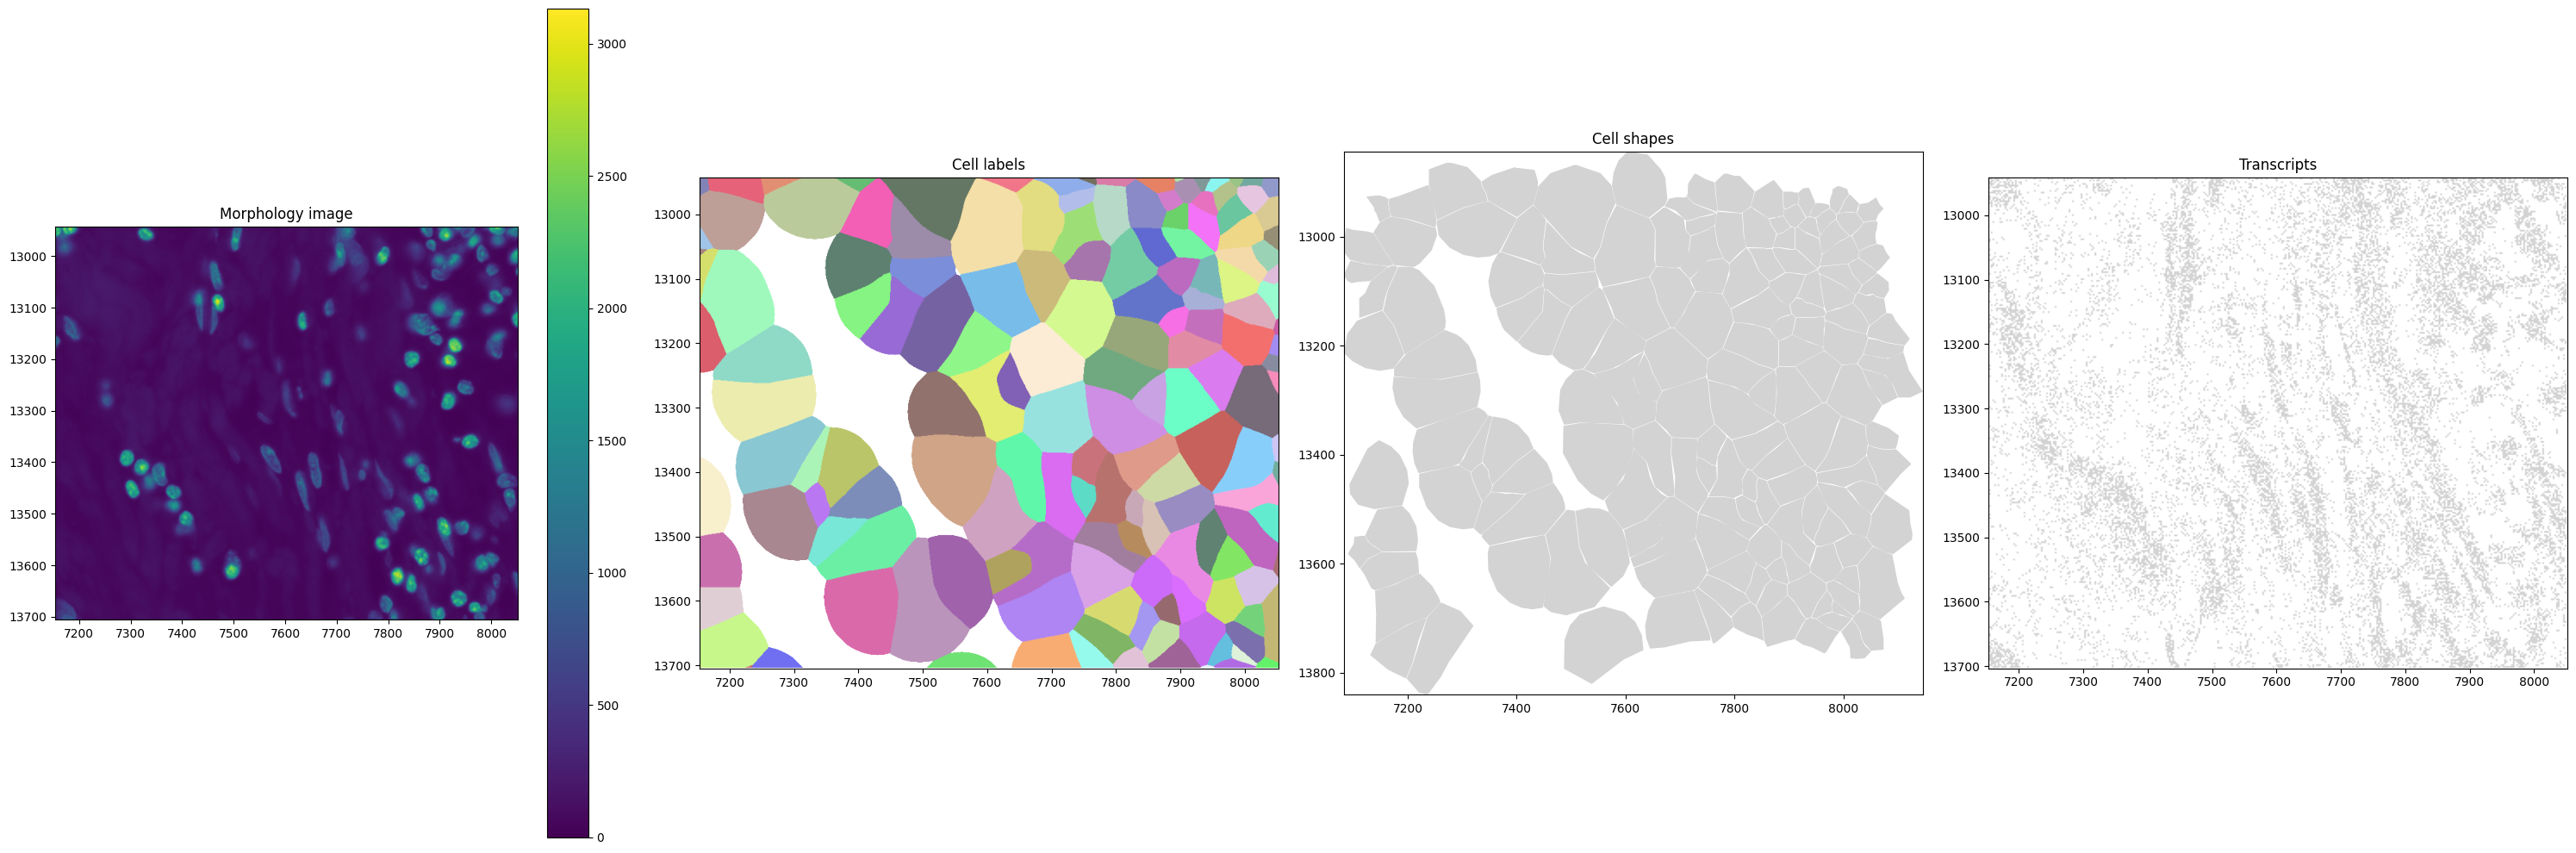

In [ ]:
axes = plt.subplots(1, 4, figsize=(30, 10))[1].flatten()

sdata_subset.pl.render_images("morphology_focus").pl.show(
    ax=axes[0], title="Morphology image", coordinate_systems="global"
)
sdata_subset.pl.render_labels("cell_labels").pl.show(ax=axes[1], title="Cell labels", coordinate_systems="global")
sdata_subset.pl.render_shapes("cell_boundaries").pl.show(ax=axes[2], title="Cell shapes", coordinate_systems="global")
sdata_subset.pl.render_points("transcripts", size=0.2).pl.show(ax=axes[3], title="Transcripts", coordinate_systems="global")